# Projections and least squares

## Projection onto a line

Projecting the vector $\mathbf{b}$ onto the vector $\mathbf{a}$ gives the vector

$$\displaystyle{\mathbf{p} = \textrm{proj}_{\mathbf{a}} \mathbf{b} = \frac{\mathbf{a}^T \mathbf{b}}{\mathbf{a}^T \mathbf{a}}\mathbf{a}}.$$

The projection $\textrm{proj}_{\mathbf{a}} \mathbf{b}$ is *the* multiple of $\mathbf{a}$ which minimizes the 'error' $\mathbf{e}=\textbf{b}-\textbf{p}.$ (Why?)


> Project the vector $\mathbf{b} = (3, 7, 10)$ onto the vector $\mathbf{a_1} = (1 ,0 ,-1).$
>
> Do this by hand first. Then check with the code cells below.

In [4]:
import numpy as np
from sympy import Matrix

In [5]:
a1 = np.array([1, -1, 0])
b = np.array([3, 7, 10])
a1, b

(array([ 1, -1,  0]), array([ 3,  7, 10]))

In [6]:
proj_1 =  ( (a1.T@b)/(a1.T@a1) ) * a1
proj_1

array([-2.,  2., -0.])

> Next, project the vector $\mathbf{b} = (3, 7, 10)$ onto the vector $\mathbf{a_2} = (-1, 1 , 0).$ 

In [8]:
a2 = np.array([0, 1, -1])
proj_2 = ( (a2.T@b)/(a2.T@a2) ) * a2
proj_2

array([-0. , -1.5,  1.5])

In [9]:
#Note the sum of the first two projections
proj_1 + proj_2

array([-2. ,  0.5,  1.5])

> Finally, project the vector $\mathbf{b} = (3, 7, 10)$ onto the vector $\mathbf{a_3} = (0 , -1, 1).$ 

In [11]:
a3 = np.array([-1, 0, 1])
proj_3 = ( (a3.T@b)/(a3.T@a3) ) * a3
proj_3

array([-3.5,  0. ,  3.5])

In [12]:
# Also note the sum of all three projections
proj_1 + proj_2 + proj_3

array([-5.5,  0.5,  5. ])

## Projection onto a subspace

Assuming that our previous vectors $\mathbf{a_1} = (1 ,0 ,-1)$, $\mathbf{a_2} = (-1 , 1, 0)$, and  $\mathbf{a_3} = (0 , -1 ,1)$ are column vectors of the matrix 

$$ A = 
\begin{bmatrix}
1 & -1 & 0 \\
0 & 1 & -1 \\
-1 & 0 & 1 \\
\end{bmatrix}
$$

we can now think about projecting $\mathbf{b}$ onto the column space of $A$. That is we want to find the linear combination of the column vectors of $A$ that will give the projection vector in **Col($A$)** that is "closest" to $\mathbf{b}$.

How can we do this?

First remember that matrix-vector multiplication is a linear combination of the columns of the matrix $A$. So if we are thinking of finding a ranking vector $\mathbf{r}$ then we are asking to find the "weights or ranks" as entries in the ranking vector $\mathbf{r}$ that give a projection vector $A\mathbf{r}$ that is perpendicular to the "error" vector $\mathbf{e} = (\mathbf{b} - A\mathbf{r}).$ 

Since the "error" vector $(\mathbf{b} - A\mathbf{r})$ is perpendicular to the column space of $A$ by construction it must be perpendicular to every column of $A$ as well. Solving for the entries of $\mathbf{r}$ is equivalent to a linear system we can form using dot products in a useful way leading to what are known as the set of *normal* equations. We will use this framework to describe least squares regression as a projection in the column space of a matrix. In this fashion we can solve systems that do not have exact (either unique or infinite) solutions.

## Normal equations

Since each column of $A$ must be perpendicular to the "error" vector $\mathbf{e} = (\mathbf{b} - A\mathbf{r}),$ consider the systems of equations given by
$$
\begin{align}
\mathbf{a_1}^T & (\mathbf{b} - A\mathbf{r})  = 0 \\
\mathbf{a_2}^T & (\mathbf{b} - A\mathbf{r})  = 0 \\
\vdots &  \\
\mathbf{a_n}^T & (\mathbf{b} - A\mathbf{r})  = 0 \\
\end{align}
$$

Also note that this system of $n$ equations in $n$ unknowns (why?) is equivalent to the matrix equation $$ A^T( \mathbf{b} - A\mathbf{r} ) = \mathbf{0}.$$

Distributing the tranpose of $A,$ and rearranging terms gives a new matrix equation we have a chance of solving! 

Check that it is allowable to write,

$$ A^T A \mathbf{r} = A^T b.$$

It turns out that if the columns of A are independent then $(A^TA)$ is invertible. 

This is **important!** The columns of $A$ must be independent to guarantee invertibilty of $A^TA$! (And hence a that a solution exists.)

How can we apply these ideas to the Massey ranking scheme? For our Massey ranking we insure invertibility of the matrix $M$ by replacing the last row of $M$ with a row of ones.

In [15]:
A = np.array([a1, a2, a3])
A

array([[ 1, -1,  0],
       [ 0,  1, -1],
       [-1,  0,  1]])

## Least squares

Switching gears, let's go back to a generic matrix equation $A\mathbf{x}=\mathbf{b}.$ 

And let's assume we are working with an *overdetermined* system., that is to say we are operating on a system of linear equations with more equations than unknowns (giving a matrix $A$ with more rows than columns.) In this particular situation it is very unlikely to have an exact solution or even any solutions!

Also, notice that when the matrix equation $A\mathbf{x}=\mathbf{b}$ has no solution, this means that $\textbf{b}$ is **not** in the column space of $A.$  

If we project $\mathbf{b}$ onto the column space $A,$ the projection $\mathbf{\widehat{b}} = \textrm{proj}_{\mathbf{a}} \mathbf{b} = A \mathbf{\widehat{x}}$ is the vector in the column space of $A$ that is 'closest' to $\mathbf{b}.$

$\hat{\mathbf{x}}$ is the least squares solution and gives the coefficients needed for the linear combination of columns to produce $\textbf{p}$ in this column view of the projection.

That's it.  This is least squares.

To find $\mathbf{\widehat{x}}$ we solve $A \mathbf{\widehat{x}} = \mathbf{b}$ by multiplying both sides by $A^T$ and taking the inverse of $A^TA$ on the left (also on both sides.)

So, $$  \mathbf{\widehat{x}} = (A^TA)^{-1}A^T \mathbf{b}.$$

We are guaranteed an inverse for $A^TA$ when the columns of $A$ are independent. This should agree with our previous development of projecting a vector onto the column space of a matrix whereby the solution for $ A^T A \mathbf{r} = A^T b$ gave us the ranking vector $\mathbf{r}$. 
 
Find $\mathbf{\widehat{x}}$ from our previous example, in the cell below.

## An example of least squares in $\mathbb{R}^2$ 

Work through together.

In [18]:
A1 = np.array([[1, 2],
              [2, 5],
              [-1, 0]])
b1 = np.array([5, -3, -1])
#print(b1)
A1_aug = np.hstack([A1, np.array([b1]).T])
A1_aug
Matrix(A1_aug).rref()[0]

A1.T@A1
A1.T@b1
I2 = np.diag(np.ones(2))
I2

A1_I2 = np.hstack([A1.T@A1, I2])
Matrix(A1_I2).rref()[0]

x_hat = np.linalg.inv(A1.T@A1)@A1.T@b1
x_hat
A1@x_hat

array([ 0., -1., -2.])

In [57]:
A_chirp_temp = np.array([[20.0, 88.6],
                         [16.0, 71.6],
                         [19.8, 93.3],
                         [18.4, 84.3],
                         [17.1, 80.6],
                         [15.5, 75.2],
                         [14.7, 69.7],
                         [15.7, 71.6],
                         [15.4, 69.4],
                         [16.3, 83.3],
                         [15.0, 79.6],
                         [17.2, 82.6],
                         [16.0, 80.6],
                         [17.0, 83.5],
                         [14.4, 76.3]])

C = A_chirp_temp[:, 0]
T = A_chirp_temp[:, 1]
C, T

(array([20. , 16. , 19.8, 18.4, 17.1, 15.5, 14.7, 15.7, 15.4, 16.3, 15. ,
        17.2, 16. , 17. , 14.4]),
 array([88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7, 71.6, 69.4, 83.3, 79.6,
        82.6, 80.6, 83.5, 76.3]))

In [77]:
# We are solving for T = b0 + b1 . C
# C -> [] [b0 b1] (this is x) = T -> []
# so -> ---- A x = b [ A is C || b is T ]

ones_vector = np.ones(15)
A2 = np.array([ones_vector, C]).T
B2 = np.array([T]).T
first_matrix = np.linalg.inv(A2.T@A2)
second_matrix = A2.T@B2

b0_b1_matrix = first_matrix@second_matrix

b0_b1_matrix

array([[22.84898231],
       [ 3.410323  ]])

In [81]:
import matplotlib.pyplot as plt

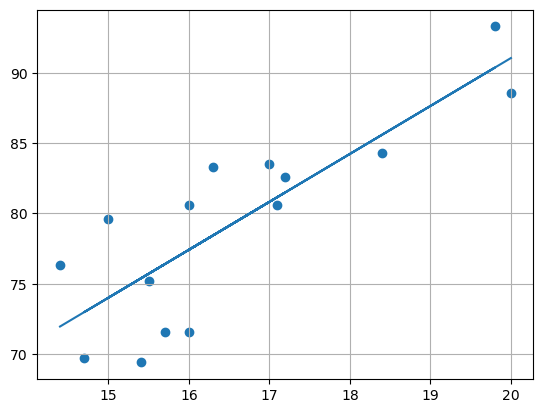

In [101]:
T_hat = b0_b1_matrix[0,0] + b0_b1_matrix[1,0]*C
plt.scatter(C,T)
plt.plot(C, T_hat)
plt.grid()